In [1]:
import pandas as pd
import numpy as np

# New Section

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Name has prefix tag so we can use it to create new varible.

In [4]:
title = []
for i in df_train['Name']:
    title.append(((((i).split(','))[1]).split('.'))[0].strip())
df_train['title'] = title

test_title = []
for i in df_test['Name']:
    test_title.append(((((i).split(','))[1]).split('.'))[0].strip())
df_test['title'] = test_title

In [5]:
pd.crosstab(df_train['title'],df_train['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


As we can see Mrs,Mr,Miss,Master tags has high frequency

In [6]:
main = ['Mrs','Mr','Miss','Master']
for i in range(len(title)):
  if title[i] not in main:
    title[i] = 'Extra'
df_train['title'] = title

for i in range(len(test_title)):
  if test_title[i] not in main:
    test_title[i] = 'Extra'
df_test['title'] = test_title


In [7]:
df_train.info()
print('--'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column     

In [8]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,title
count,891,891,891,204,889,891
unique,891,2,681,147,3,5
top,"Barkworth, Mr. Algernon Henry Wilson",male,CA. 2343,G6,S,Mr
freq,1,577,7,4,644,517


1. Here we can see 681 unique value in tickets mean it is not catagorial variable.it contain 210 duplicate entry and it is not corelated to survived variable.
2. name and passengerId does not related to survived variable 
3. Cabin has >70% missing values

droping those variables

In [9]:
df_train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [10]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [11]:
df_train.shape

(891, 9)

In [12]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
title         0
dtype: int64

In [13]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

filling data in age and Embarked with mean and high frequent value respectively.

In [14]:
df_train.fillna(value = {'Age':df_train['Age'].mean(),'Embarked':'S'},inplace=True)
df_test.fillna(value = {'Age':df_train['Age'].mean(),'Embarked':'S'},inplace=True)

In [15]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
title       0
dtype: int64

Removing duplicates

In [16]:
df_train.drop_duplicates(subset=df_train.columns[1:],inplace=True)

In [17]:
df_train.shape

(772, 9)

In [18]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


here age and fare are not classified so we need to create bins and classsify them

In [19]:
df_train[['Age','Fare']].describe()

,Age,Fare
count,772.000000,772.000000
mean,29.839418,35.115322
std,13.754421,52.472196
min,0.420000,0.000000
25%,22.000000,8.050000
50%,29.699118,16.100000
75%,36.000000,34.375000
max,80.000000,512.329200


(array([621.,  98.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

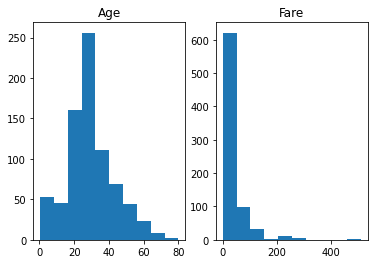

In [20]:
import matplotlib.pyplot as plt
fig,(axs1,axs2) = plt.subplots(1,2)
axs1.set_title('Age')
axs1.hist(df_train['Age'])
axs2.set_title('Fare')
axs2.hist(df_train['Fare'])

As we can see 

In [21]:
label = ['Children','Youth','Adults','Seniors']
df_train['Age_cat']=pd.cut(df_train['Age'],[0,15,35,55,80],labels=label)
df_test['Age_cat']=pd.cut(df_test['Age'],[0,15,35,55,80],labels=label)

In [22]:
pd.crosstab(df_train['Age_cat'],df_train['Survived'])

Survived,0,1
Age_cat,,
Children,34,48
Youth,286,192
Adults,103,70
Seniors,27,12


In [23]:
label_fare = ['low','medium','high']
df_train['Fare_cat']=pd.cut(df_train['Fare'],[-1,15,50,513],labels=label_fare)
df_test['Fare_cat']=pd.cut(df_test['Fare'],[-1,15,50,513],labels=label_fare)

In [24]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_cat,Fare_cat
0,0,3,male,22.0,1,0,7.2500,S,Mr,Youth,low
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Adults,high
2,1,3,female,26.0,0,0,7.9250,S,Miss,Youth,low
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Youth,high
4,0,3,male,35.0,0,0,8.0500,S,Mr,Youth,low


In [25]:
pd.crosstab(df_train['Fare_cat'],df_train['Survived'])

Survived,0,1
Fare_cat,,
low,258,102
medium,146,114
high,46,106


In [26]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
title       0
Age_cat     0
Fare_cat    0
dtype: int64

In [27]:
df_train.drop(['Age','Fare'],axis=1,inplace=True)
df_test.drop(['Age','Fare'],axis=1,inplace=True)

In [28]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,title,Age_cat,Fare_cat
0,0,3,male,1,0,S,Mr,Youth,low
1,1,1,female,1,0,C,Mrs,Adults,high
2,1,3,female,0,0,S,Miss,Youth,low
3,1,1,female,1,0,S,Mrs,Youth,high
4,0,3,male,0,0,S,Mr,Youth,low


Creating heat map to check correlation between variables if there is any two variable has high correlation then we will drop one of them.

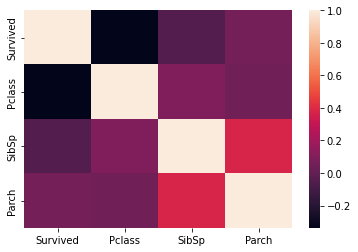

In [29]:
import seaborn as sns

corr = df_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [30]:
df_dummy_train = pd.get_dummies(df_train)
df_dummy_test = pd.get_dummies(df_test)

In [31]:
df_dummy_test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Extra,title_Master,title_Miss,title_Mr,title_Mrs,Age_cat_Children,Age_cat_Youth,Age_cat_Adults,Age_cat_Seniors,Fare_cat_low,Fare_cat_medium,Fare_cat_high
0,3,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
2,2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,3,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4,3,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0


**Train Models**

In [32]:
Y_train = df_dummy_train['Survived']
X_train = df_dummy_train.drop(['Survived'],axis=1)

In [33]:
X_test = df_dummy_test

In [34]:
print(Y_train.head())
print('--'*20)
print(X_train.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
----------------------------------------
   Pclass  SibSp  Parch  ...  Fare_cat_low  Fare_cat_medium  Fare_cat_high
0       3      1      0  ...             1                0              0
1       1      1      0  ...             0                0              1
2       3      0      0  ...             1                0              0
3       1      1      0  ...             0                0              1
4       3      0      0  ...             1                0              0

[5 rows x 20 columns]


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
logi = LogisticRegression()
logi.fit(X_train,Y_train)
logi.predict(X_test)

print(logi.score(X_train,Y_train)*100)

81.34715025906736


In [37]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_hat = knn.predict(X_test)
print(knn.score(X_train, Y_train) * 100)

81.99481865284974


In [38]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, Y_train)
Y_hat = rf.predict(X_test)
print(rf.score(X_train, Y_train) * 100)

86.52849740932642


In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_hat = decision_tree.predict(X_test)
print(decision_tree.score(X_train, Y_train) * 100)

86.52849740932642


In [40]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_hat = svc.predict(X_test)
print(svc.score(X_train, Y_train) * 100)

81.60621761658031


Decision tree and random forest has same score value and it is highest score among other models

Confution matrix

In [41]:
df_train['DT'] = decision_tree.predict(X_train)
df_train['RF'] = rf.predict(X_train)

In [42]:
pd.crosstab(df_train['DT'],df_train['Survived'])

Survived,0,1
DT,,
0,428,82
1,22,240


In [43]:
pd.crosstab(df_train['Survived'],df_train['RF'],)

RF,0,1
Survived,,
0,413,37
1,67,255


In [44]:
from sklearn.metrics import confusion_matrix
Rf_cm = confusion_matrix(df_train['Survived'],df_train['RF'])
DT_cm = confusion_matrix(df_train['Survived'],df_train['DT'])

In [45]:
tn, fp, fn, tp = Rf_cm.ravel()

RF_PPV = tp/(tp+fp)

In [46]:
tn, fp, fn, tp = DT_cm.ravel()
DT_PPV = tp/(tp+fp)

In [47]:
print('Decision Tree PVV:',DT_PPV*100)
print('Random forest PVV:',RF_PPV*100)

Decision Tree PVV: 91.6030534351145
Random forest PVV: 87.32876712328768


Here we can see, we get higher precision in Decision Tree. so i am choosing decision_tree model to predict survived passangers.

In [48]:
pridicted_survived =  decision_tree.predict(X_test)

In [49]:
pridicted_survived.shape

(418,)